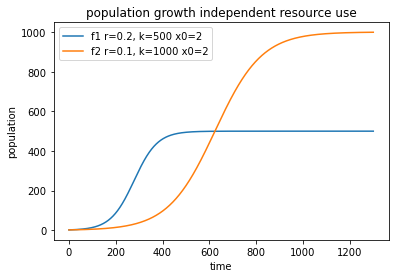

In [135]:
import matplotlib.pyplot as plt
import numpy as np

def growth_fn(r, k):
    return lambda x, y: r * x * (1 - (x + y) / k)


def step_forward(x, y, f, dt):
    """Performs the "Explicit Euler" method for approximating the ODEs"""
    dx = dt * f(x, y)
    return x + dx


funs = {
    "f1": {
        "params": (0.2, 500),
        "fn": growth_fn(0.2, 500),
    },
    "f2": {
        "params": (0.1, 1000),
        "fn": growth_fn(0.1, 1000),
    },
}

f1x0 = 2
f2x0 = 2

f1vals = [f1x0]
f2vals = [f2x0]
for i in range(1300):
    f1x0 = step_forward(f1x0, 0, funs["f1"]["fn"], 0.1)
    f2x0 = step_forward(f2x0, 0, funs["f2"]["fn"], 0.1)
    f1vals.append(f1x0)
    f2vals.append(f2x0)
plt.plot(f1vals, label="f1 r={1}, k={2} x0={0}".format(
    f1vals[0], funs["f1"]["params"][0], funs["f1"]["params"][1]))
plt.plot(f2vals, label="f2 r={1}, k={2} x0={0}".format(
    f2vals[0], funs["f2"]["params"][0], funs["f2"]["params"][1]))
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.title("population growth independent resource use")


Text(0.5, 1.0, 'population growth dependant resource use')

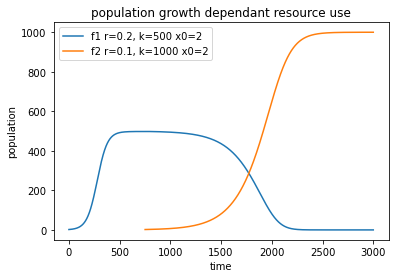

In [157]:

f1x0 = 2
f2x0 = 2
f1vals = [f1x0]
f2vals = [f2x0]
for i in range(3000):
    f1x0 = step_forward(f1x0, f2x0, funs["f1"]["fn"], 0.1)
    f2x0 = step_forward(f2x0, f1x0, funs["f2"]["fn"], 0.1) if i > 750 else f2x0
    f1vals.append(f1x0)
    f2vals.append(np.nan if i < 750 else f2x0)
plt.plot(f1vals, label="f1 r={}, k={} x0={}".format(
    funs["f1"]["params"][0], funs["f1"]["params"][1], f1vals[0]))
plt.plot(f2vals, label="f2 r={}, k={} x0={}".format(
    funs["f2"]["params"][0], funs["f2"]["params"][1], f2vals[0]))
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.title("population growth dependant resource use")
